In [1]:
from Wavelet_Fast import *

import numpy as np
import matplotlib
from scipy import  fft
from astropy.io import fits

Analysis of NGC 5457:

In [2]:
names=['NGC5457_Ha_sub','NGC5457_HI_MOM0']
paths=['THINGS\\NGC_5457_I_Ha_hwb2001_clip.fits','THINGS\\NGC_5457_RO_MOM0_THINGS_fix_registered.fits']
scales=[[2,60,1],[2,60,1]]
scale_types=["triplet","triplet"]
pixel_scales=[2.03,2.03]
color=[]
distance=1000000
crop = [[[25,1000],[25,1000]],[[25,1000],[25,1000]]]

In [3]:
cubes = np.array([],dtype=object)
for i in range(len(names)):
    cubes = np.append(cubes,pethat_wavelet_scale_analysis(names[i],paths[i],crop[i],scales[i],scale_types[i],pixel_scale=pixel_scales[i],distance=distance))

Commencing the wavelet scale analysis of NGC5457_Ha_sub
|████████████████████████████████████████| 60/60 [100%] in 4:07.2 (0.24/s) 
Wavelet scale analysis of NGC5457_Ha_sub has finished.
Commencing the wavelet scale analysis of NGC5457_HI_MOM0
|████████████████████████████████████████| 60/60 [100%] in 4:37.3 (0.22/s) 
Wavelet scale analysis of NGC5457_HI_MOM0 has finished.


<Figure size 640x480 with 0 Axes>

Saving the layers of NGC5457_Ha_sub as PNG ... DONE
Creating GIF from the coefficients of NGC5457_Ha_sub ... DONE
Saving the layers of NGC5457_HI_MOM0 as PNG ... DONE
Creating GIF from the coefficients of NGC5457_HI_MOM0 ... DONE


<Figure size 640x480 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

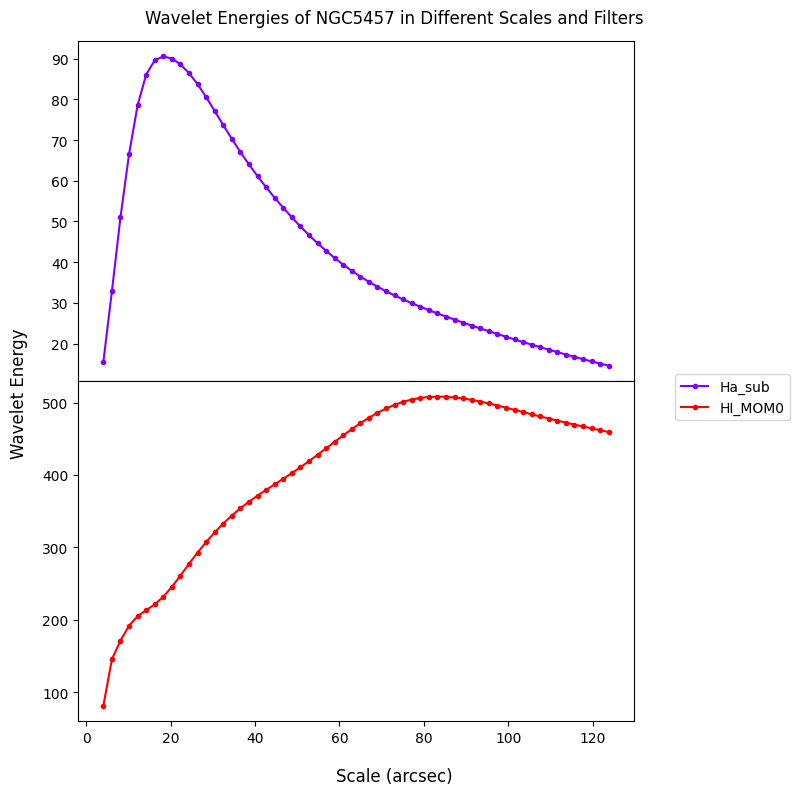

In [4]:
data_batch_energy_plot_cube(cubes,'arcsec',save_results=True)

The normal correlation between the maps is:  0.5887240048589492


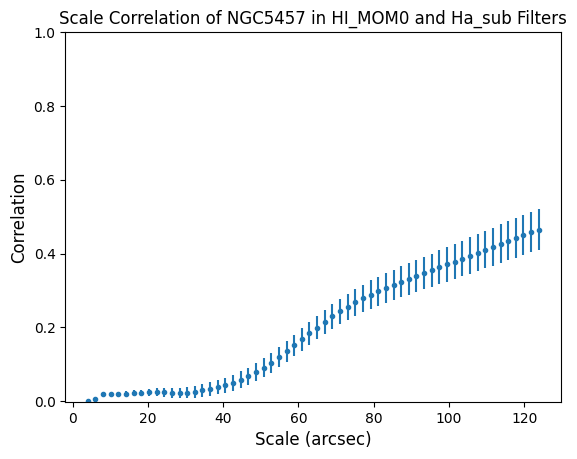

<Figure size 640x480 with 0 Axes>

In [7]:
plot_correlation(cubes[0], cubes[1], unit='arcsec', do_show = True)

4.117309 64.48449 14025.584


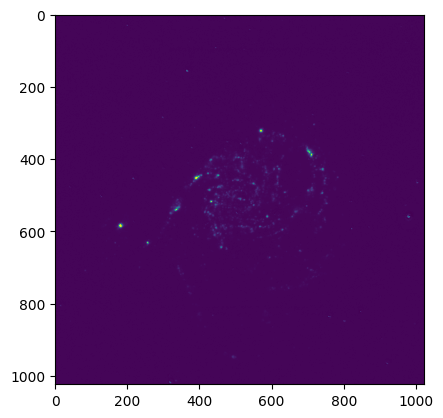

In [6]:
adata = fits.open('.\\data\\'+paths[0])
a = adata[0].data
print(np.mean(a),np.std(a),np.max(a))
a=np.where(a>2000,2000,a)
a=np.where(a<-25,-25,a)
plt.imshow(a)
hdu_new = fits.PrimaryHDU(a,adata[0].header)
hdu_new.writeto('.\\data\\THINGS\\NGC_5457_I_Ha_hwb2001_clip.fits',overwrite=True)

Commencing the wavelet scale analysis of NGC5457_Ha_sub
|████████████████████████████████████████| 5/5 [100%] in 22.8s (0.22/s) 
Wavelet scale analysis of NGC5457_Ha_sub has finished.


<Figure size 640x480 with 0 Axes>

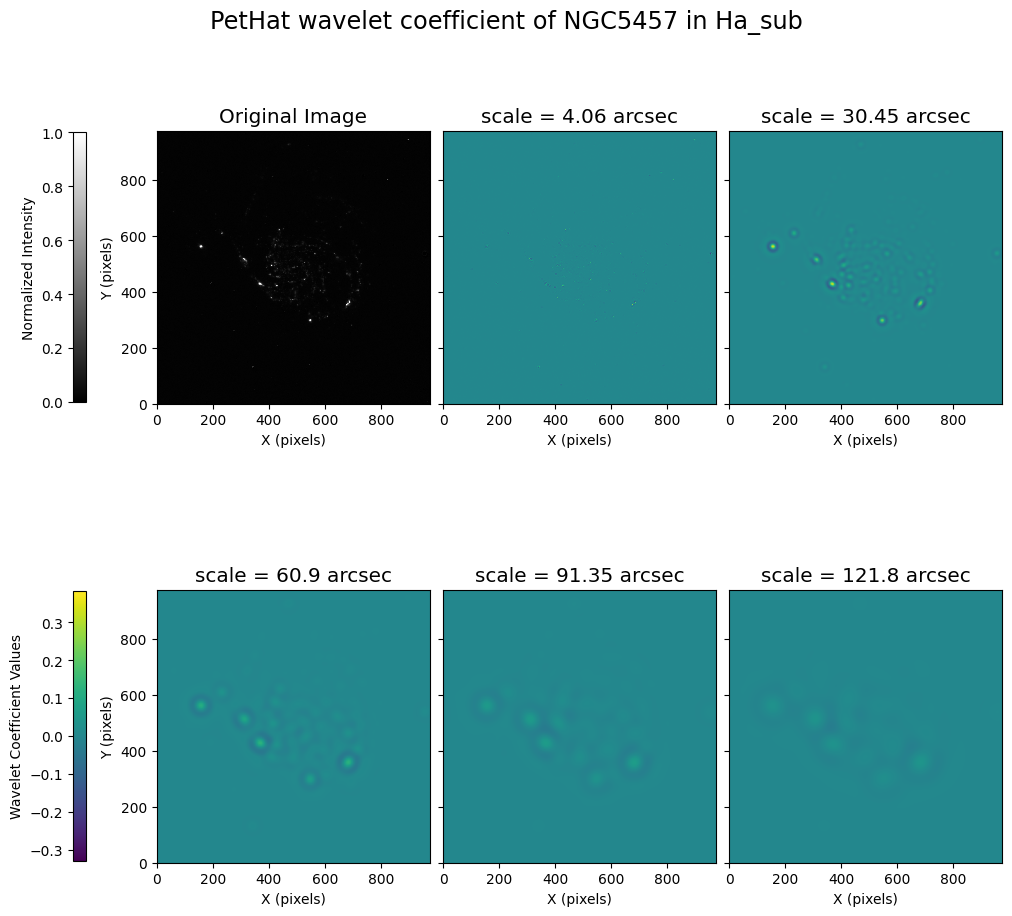

Commencing the wavelet scale analysis of NGC5457_HI_MOM0
|████████████████████████████████████████| 5/5 [100%] in 23.0s (0.22/s) 
Wavelet scale analysis of NGC5457_HI_MOM0 has finished.


<Figure size 640x480 with 0 Axes>

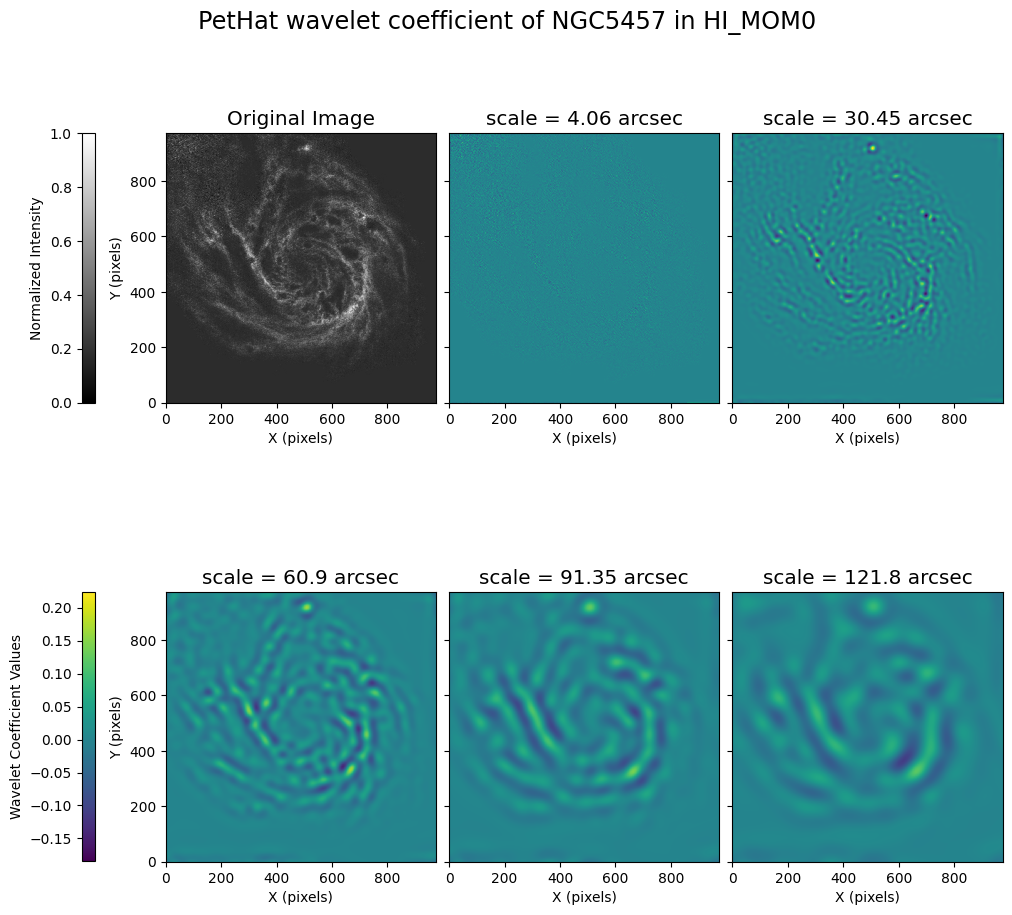

In [3]:
for i in range(2):
    plot_five_coeffs(paths[i],names[i],crop[i],'arcsec',[2,15,30,45,60], pixel_scales[i], distance=distance)